In [1]:
from OFDM import *
%matplotlib inline
plt.rcParams["figure.figsize"] = [8.0,5.0]

In [2]:
bits = load_file("gr5ch1.bmp")

In [3]:
tx = transmitter(mode = "C2", encoding="XOR")

In [4]:
signal = tx.transmit(bits)

------------------------------------------
TRANSMIT
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               1184 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      180
Number of bits to transmit:         1049168
Number of OFDM symbols to transmit: 540
Number of packets to transmit:      3


In [5]:
#r = play_record(signal, tx.fs)
sd.play(signal, tx.fs)

In [6]:
fs, r = wavfile.read("received_signals/Completed/gr5ch1_signal.wav")
r = r / 1.0         # Convert to float so numpy can read the file

/Users/Adam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [7]:
rx = receiver(mode = "A2", encoding="XOR")

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               224 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      180
Number of received OFDM symbols:    540
Number of received bits:            1512000


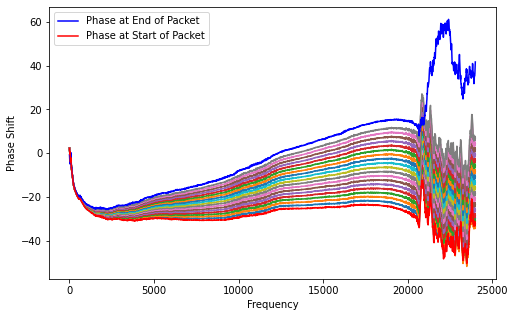

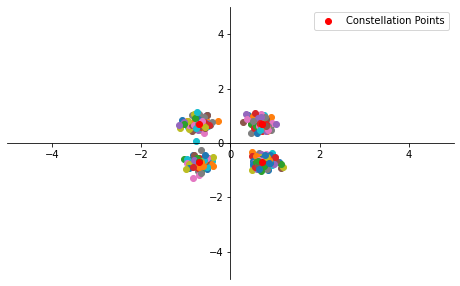

In [8]:
rx_bits, Hstart, Hend = rx.receive(r, graph_output=True)

In [9]:
errs = np.sum(abs(bits-rx_bits[:len(bits)]))
print("BER: {}".format(errs/len(bits)))
name, file = save_file(rx_bits)

BER: 0.023375665289067146
File Name: gr5ch1.bmp
File Size: 131128 bytes


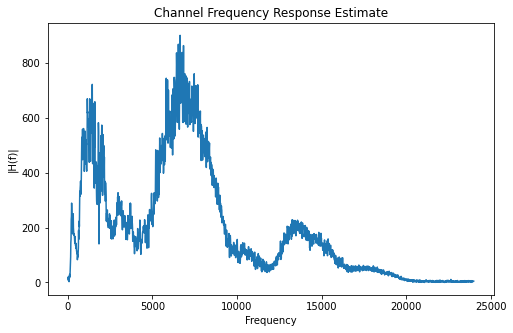

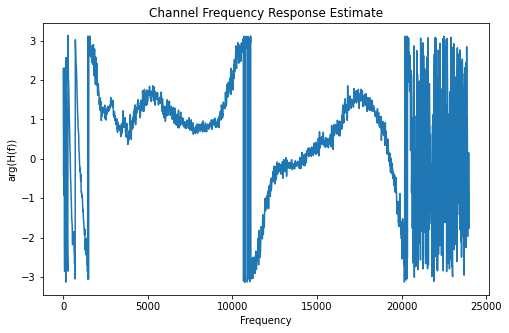

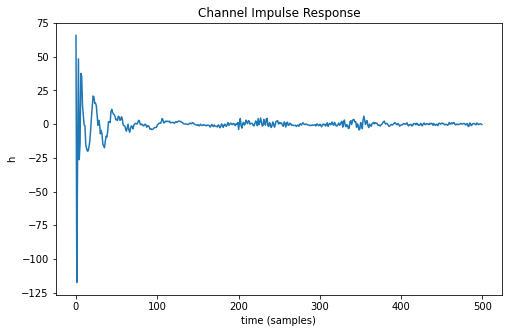

In [10]:
rx.channel_response(Hstart)